In [2]:
# YoutubeModule Class
from CrawlingModule import YoutubeBuilder
import pandas as pd
import numpy as np
import Preprocessing as prep
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image
from collections import Counter
from tqdm import tqdm


# KEY 파일로 읽어오기
KEY_FILE = open('./API_KEY.txt', 'r')

# API_KEY 할당
API_KEY = KEY_FILE.readline()

# YoutbeModule Instarnce 
bulider = YoutubeBuilder(API_KEY)

# channelId = bulider.search_get_channelId('침착맨')
# channelId

In [ ]:
# channelId = bulider.search_get_channelId('할명수')
# video_id_list = bulider.search_get_videoId_in_channel(channelId=channelId)

# video_list = bulider.get_videos_in_videoId_list(videoId_list=video_id_list)

In [ ]:
# comments_list, none_video_id_list = bulider.get_comments(video_id_list)

In [ ]:
# df = pd.DataFrame(video_id_list, columns=['video_id'])
# (df.video_id.value_counts() > 2).values

In [ ]:
# # video_id,category_id,category_name,title,views_count,like_count,uploaded_at
# df = pd.DataFrame(video_list, columns=['video_id', 'category_id', 'category_name', 'title', 'views_count', 'like_count', 'uploaded_at', 'tags'])

# df.tags = chim_df.tags.apply(lambda x : prep.extract_tags(x, name='#할명수 '))
# df.uploaded_at = pd.to_datetime(chim_df.uploaded_at)
# df.to_csv('./데이터/할명수_videos.csv', index=False)

In [ ]:
# df = pd.DataFrame(comments_list, columns=['video_id', 'comment_id', 'comment', 'like_count', 'created_at', 'updated_at'])
# df.created_at = pd.to_datetime(df.created_at)
# df.updated_at = pd.to_datetime(df.updated_at)


# df.to_csv('./데이터/할명수_comments.csv', index=False)
# # df.isna().sum()

In [3]:
chim_comment_df = pd.read_csv('./데이터/침착맨_commets.csv', encoding='utf-8', engine='python')

In [4]:
chim_comment_df

,video_id,comment_id,comment,like_count,created_at,updated_at
0,7QnVBNbTVeM,Ugzmf2KCLNfGMvjOAIx4AaABAg,침소리와. 궤소리의 만남,0,2023-02-27T06:21:37Z,2023-02-27T06:21:37Z
1,7QnVBNbTVeM,UgwcByZZhnHLQtFb_od4AaABAg,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이날따라 침방장 왜케 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0,2023-02-27T06:19:49Z,2023-02-27T06:19:49Z
2,7QnVBNbTVeM,UgzK43w3es4_sUES3-p4AaABAg,"오늘 영상을 요약하자면 ""안드로이드는 전기양의 꿈을 꾸는가?""입니다 아아 필립K딕 ...",0,2023-02-27T06:01:43Z,2023-02-27T06:01:43Z
3,7QnVBNbTVeM,UgwTAaUHneZhtpK_LVZ4AaABAg,궤도님 기계가 분명합니다,0,2023-02-27T05:55:00Z,2023-02-27T05:55:00Z
4,7QnVBNbTVeM,Ugxs2qGT1LRd1z0gb9Z4AaABAg,월드컵 특강 너무 좋은데?,0,2023-02-27T05:53:29Z,2023-02-27T05:53:29Z
...,...,...,...,...,...,...
338919,SRS4AeJzhoc,UghVMiKNyVyI6HgCoAEC,아재 게임피지컬 ㅁㅊㄷ ㅁㅊ 답답,0,2016-05-31T10:57:36Z,2016-05-31T10:57:36Z
338920,SRS4AeJzhoc,Ugg8ahjVX6z-13gCoAEC,ㅋㅋㅋㅋㅋㅋ 초반부 설명하는거 웰케 웃겨요,0,2016-05-31T10:39:53Z,2016-05-31T10:39:53Z
338921,SRS4AeJzhoc,UgjYCSAFu6wUQ3gCoAEC,침하,0,2016-05-31T10:39:45Z,2016-05-31T10:39:45Z
338922,SRS4AeJzhoc,UggPw6PSvwpGGngCoAEC,캬 갓겜을 이제서야,0,2016-05-31T10:36:26Z,2016-05-31T10:36:26Z


In [7]:
unique_video_id = chim_comment_df.video_id.unique()
video_id_and_count = dict()

for video_id in unique_video_id:
    video_id_and_count[video_id] = chim_comment_df.loc[chim_comment_df.video_id == video_id].like_count.sum()
    

In [8]:
# 비디오별 댓글 좋아요 수
comments_like_sum = sorted(video_id_and_count.items(), key=lambda x:x[1], reverse=True)

video_on_comments_like_sum = list()

for idx, value in enumerate(comments_like_sum):
    if idx == 10:
        break
    video_on_comments_like_sum.append(value)

video_on_comments_like_sum


[('9LQsLPsKRq8', 249220),
 ('53XqM_ofaKw', 190285),
 ('IfOSBmBCWw0', 179199),
 ('Z1vgOoIuP5M', 177677),
 ('pkXiOnXAO90', 159250),
 ('IxaOybVE50Y', 157263),
 ('hnanNlDbsE4', 156647),
 ('WeGDixN-u48', 138191),
 ('V1ryDPaC6mo', 124719),
 ('SP-LJqVgQuw', 120800)]

In [9]:
test_list = []
new_df = list()
stopwords = prep.stopwords('./데이터/stopwords.txt')

for video_id in tqdm(video_on_comments_like_sum):
    new_df.append(chim_comment_df.loc[chim_comment_df.video_id == video_id[0]].comment.apply(lambda x : prep.text_cleaning(x, stopwords)))

100%|██████████| 10/10 [01:09<00:00,  6.95s/it]


In [ ]:
font_path = r'C:/Windows/Fonts/malgun.ttf'
youtube_mask = np.array(Image.open('./데이터/youtube_logo.jfif'))


# def make_colors(word, font_size, position, orientation, random_state, **kwargs):
#     r = random_state.randint(170, 220)
#     g = random_state.randint(0, 20)
#     b = random_state.randint(0, 60)
    
#     color = 'rgb(%d, %d, %d)' % (r,g,b)
#     return color



for df in new_df:
    string_dict = dict()
    for comment in df:
        for key, value in Counter(comment).most_common(10):
            string_dict[key] = value
            
    wc = WordCloud(font_path=font_path, background_color='white', stopwords=['개소리', '존나', '개', '진짜', '정신'], mask=youtube_mask,
           max_font_size=30, scale=7).generate_from_frequencies(string_dict)
    plt.figure(figsize=(10, 5))
    # wc.recolor(color_func=make_colors, random_state=True)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    del string_dict
    wc.to_file(filename="침착맨_원피스.png")



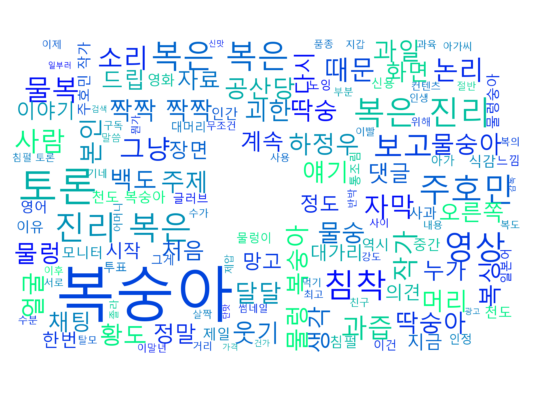

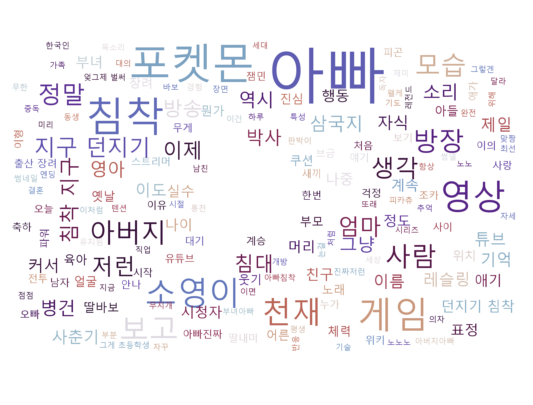

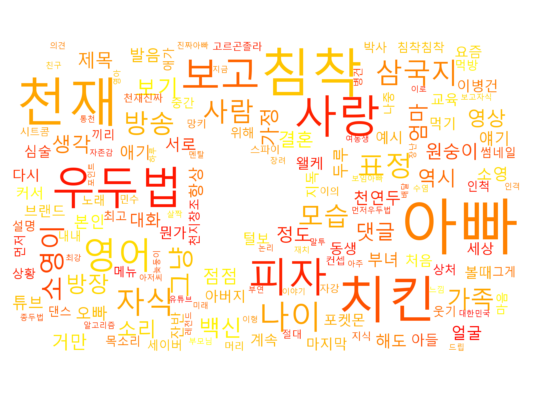

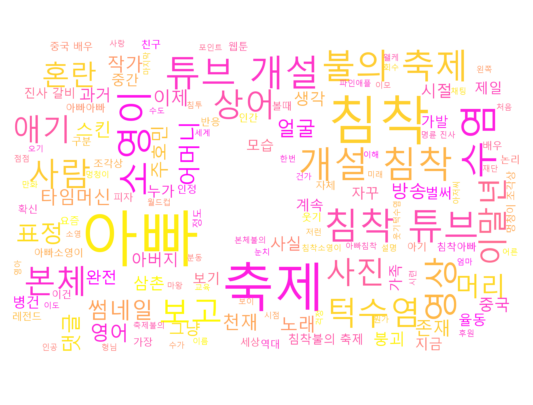

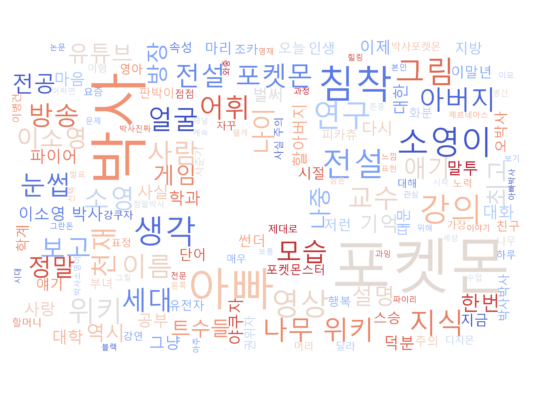

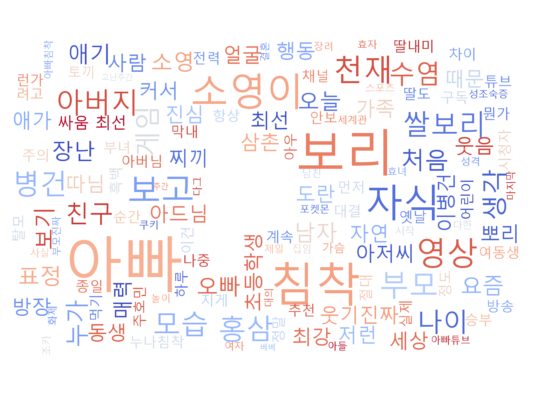

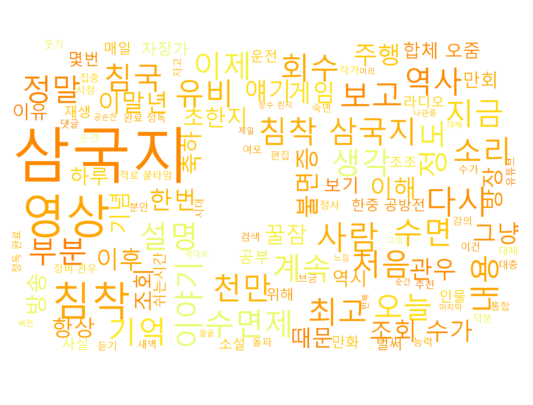

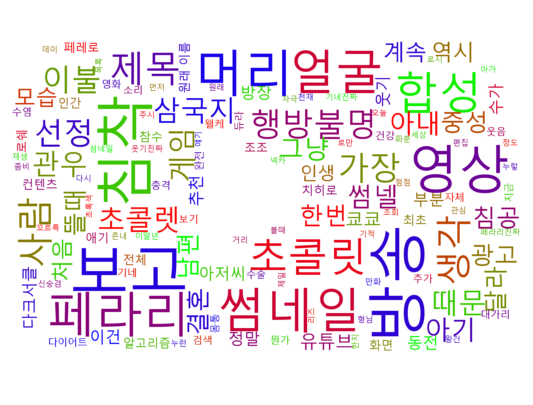

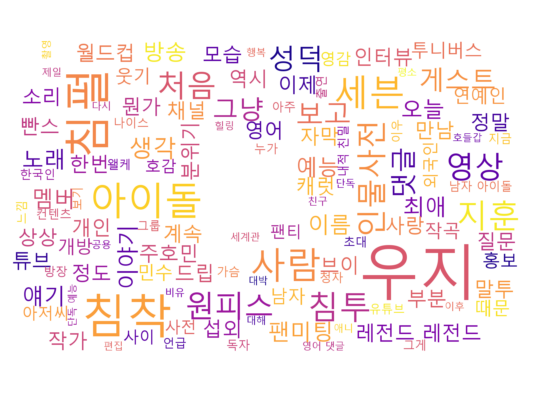

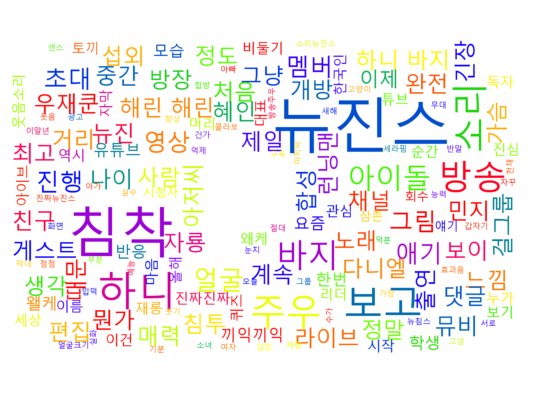

IndexError: list index out of range

In [21]:
font_path = r'C:/Windows/Fonts/malgun.ttf'
youtube_mask = np.array(Image.open('./데이터/youtube_logo.jfif'))


# def make_colors(word, font_size, position, orientation, random_state, **kwargs):
#     r = random_state.randint(170, 220)
#     g = random_state.randint(0, 20)
#     b = random_state.randint(0, 60)
    
#     color = 'rgb(%d, %d, %d)' % (r,g,b)
#     return color


count = 0
color = ['winter', 'twilight_shifted', 'autumn', 'spring', 'coolwarm', 'coolwarm_r', 'Wistia', 'brg_r', 'plasma_r', 'prism']

for df in new_df:
    string = ''
    for comment in df:
        string += ' '.join(comment)
    
        
    wc = WordCloud(font_path=font_path, background_color='white', stopwords=['개소리', '존나', '개', '진짜', '정신'], mask=youtube_mask,
           max_font_size=30, scale=7, colormap=color[count]).generate(string)
    plt.figure(figsize=(10, 5))
    # wc.recolor(color_func=make_colors, random_state=True)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()
    del string
    wc.to_file(filename=f"침착맨_{video_on_comments_like_sum[count]}.png")
    count += 1



In [20]:
video_on_comments_like_sum

[('9LQsLPsKRq8', 249220),
 ('53XqM_ofaKw', 190285),
 ('IfOSBmBCWw0', 179199),
 ('Z1vgOoIuP5M', 177677),
 ('pkXiOnXAO90', 159250),
 ('IxaOybVE50Y', 157263),
 ('hnanNlDbsE4', 156647),
 ('WeGDixN-u48', 138191),
 ('V1ryDPaC6mo', 124719),
 ('SP-LJqVgQuw', 120800)]

In [ ]:
from konlpy.tag import Okt
import re

def clean_text(text):
    text = text.replace("·", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣]+'
    text = re.sub(pattern=pattern, repl='', string=text)
    return text

def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['Noun', 'Verb'] and len(s) >1]
    return nouns

def tokenize(df):
    tokenizer = Okt()
    processed_data = []
    for sent in tqdm(df['comment']):
        sentence = clean_text(str(sent).replace("\n", "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

test = tokenize(chim_comment_df)
test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from numpy import dot
from numpy.linalg import norm
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()


def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))


vector = CountVectorizer()

strop_words = prep.stopwords('./데이터/stopwords.txt')

# doc1 = vector.fit_transform(chim_comment_df[chim_comment_df.video_id == '9LQsLPsKRq8'].head(10).comment.apply(lambda x : prep.text_cleaning(x, strop_words)).iloc[7]).toarray()
# doc2 = vector.fit_transform(chim_comment_df[chim_comment_df.video_id == '9LQsLPsKRq8'].head(10).comment.apply(lambda x : prep.text_cleaning(x, strop_words)).iloc[9]).toarray()
# print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
# doc1, doc2

max_len = max(len(item) for item in chim_comment_df[chim_comment_df.video_id == '9LQsLPsKRq8'].comment.apply(lambda x : prep.text_cleaning(x, strop_words)))

print('최대 길이 : ', max_len)

In [ ]:
tokenizerizerm_comment_df.comment

In [ ]:
for sentence in chim_comment_df[chim_comment_df.video_id == '9LQsLPsKRq8'].comment.apply(lambda x : prep.text_cleaning(x, strop_words)).values:
    print(sentence)


In [ ]:
doc1 = vector.fit_transform(a).toarray()
doc2 = vector.fit_transform(b).toarray()
print('문서 1과 문서2의 유사도 : \n',cos_sim(doc1, doc2))


In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

dictionary = corpora.Dictionary(test)

dictionary.filter_extremes(no_below=2, no_above=0.5)


corpus = [dictionary.doc2bow(text) for text in test]

num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [ ]:
top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

In [ ]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

In [ ]:
model.log_perplexity(corpus)

In [ ]:
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()

In [ ]:
print(coherence)

In [18]:
comment_df = pd.read_csv('./데이터/침착맨_commets.csv', encoding='utf-8', engine='python')
stop_words = prep.stopwords('./데이터/stopwords.txt')


prep.word_freq(comment_df)

,word,count
0,침,40253
1,소,19096
2,리,57383
3,와,18807
4,.,230075
...,...,...
4801,ほ,1
4802,벛,1
4803,닊,1
4804,슁,1


In [11]:
import pygwalker as pyg
import pandas as pd
import Preprocessing as prep

stop_words = prep.stopwords('./데이터/stopwords.txt')



df = pd.read_csv('./데이터/임나은_videos.csv', encoding='utf-8', engine='python')
df.uploaded_at = pd.to_datetime(df.uploaded_at)
df.tags.fillna("None", inplace=True)
df.tags = df.tags.apply(lambda text: prep.extract_human_tags(text, df, "tags", "./데이터/chim_dict.txt"))
df.title = df.title.apply(lambda x : prep.text_cleaning(x, stop_words))


pygw = pyg.walk(df)

In [ ]:
new_df = df.loc[~(df.tags.str.contains("shorts"))].sort_values(by="views_count", ascending=False)
new_df.loc[(new_df.title.str.contains("캠")) | (new_df.title.str.contains("얼"))].sort_values(by="uploaded_at")